###***Лабораторна робота №2-3***
**Тема**: «Чисельні методи розв’язання нелінійних рівнянь». Уточнення кореня нелінійного рівняння». Метод Ньютона (метод
дотичних). Комбінований метод.

**Завдання**: Розв’язати нелінійне алгебраїчне рівняння f(x)=0 з точністю
до 0,0001. Відокремлення коренів виконати аналітично. Уточнення коренів
провести методом половинного ділення та методом хорд.

Новосад Тетяни, ФІТ 2-8

*Варіант 19*



###*Висновок*:

На парі ми пройшли тему "Чисельні методи розв’язання нелінійних рівнянь",
"Уточнення кореня нелінійного рівняння", "Метод Ньютона (метод
дотичних)" та "Комбінований метод".  Розв’язали нелінійне алгебраїчне рівняння f(x)=0 з точністю до 0,0001. Виконали відокремлення коренів аналітично.


### НЕЛІНІЙНЕ РІВНЯННЯ
3 * x^4 - x^3 + 10 * x^2 - 5 * x - 3 = 0

In [4]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.2 MB/s eta 0:00:00


In [7]:
#Відокремлення коренів
import numpy as np
import numdifftools as nd
def f(x):
    return 3 * x**4 - x**3 + 10 * x**2 - 5 * x - 3


def find_segments():
    search_range = np.arange(-10, 10, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Знайдено сегмент:  [{a}, {b}]')

Знайдено сегмент:  [-1, 0]
Знайдено сегмент:  [0, 1]


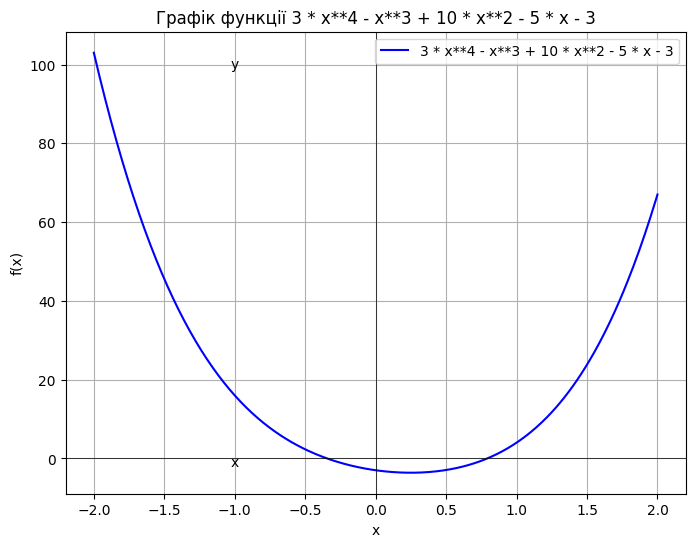

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3 * x**4 - x**3 + 10 * x**2 - 5 * x - 3

x = np.linspace(-2, 2, 400)

y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='3 * x**4 - x**3 + 10 * x**2 - 5 * x - 3', color='blue')
plt.title('Графік функції 3 * x**4 - x**3 + 10 * x**2 - 5 * x - 3')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(-1, -1, 'x', ha='center', va='center')
plt.text(-1, 100, 'y', ha='center', va='center')

plt.grid(True)
plt.legend()
plt.show()

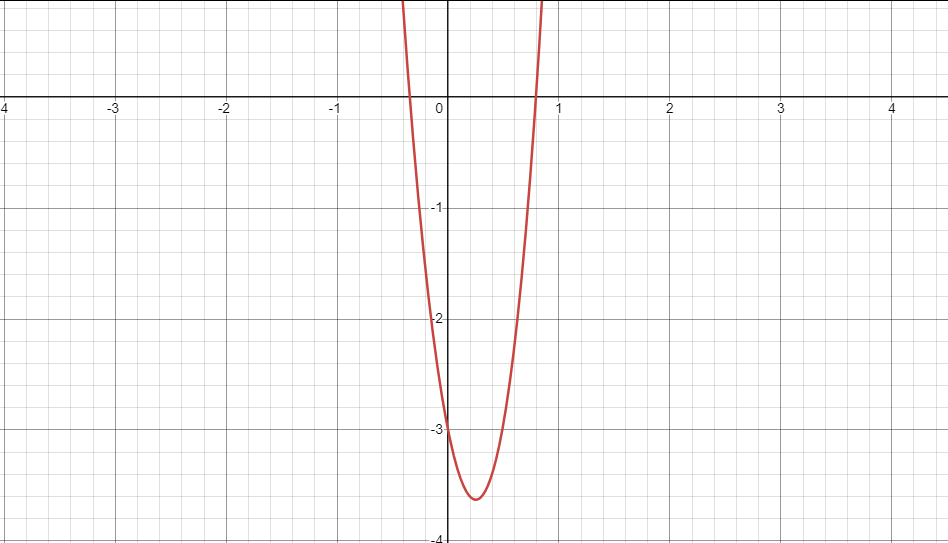

In [16]:
# Лр2. Метод половинного ділення

def rec(a, b, eps):
    while (abs(a - b) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2

    print('x = ', round(x, 5), '  -   Спосіб половинного ділення')

# Метод хорд
def hord(a, b, eps):
    derivative_f = nd.Derivative(f, n=1)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while (abs(xi_1 - xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x = ', round(xi_1, 5), '  -   Метод хорд')

if __name__ == "__main__":
    a1, b1 = -1, 0
    a2, b2 = 0, 1
    eps = 0.0001
    print("\n Розв'язки на відрізку [-2,-1]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\n Розв'язки на відрізку [0,1]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)


 Розв'язки на відрізку [-2,-1]
x =  -0.34512   -   Спосіб поділу навпіл
x =  -0.34507   -   Метод хорд

 Розв'язки на відрізку [0,1]
x =  0.79227   -   Спосіб поділу навпіл
x =  -0.34512   -   Метод хорд


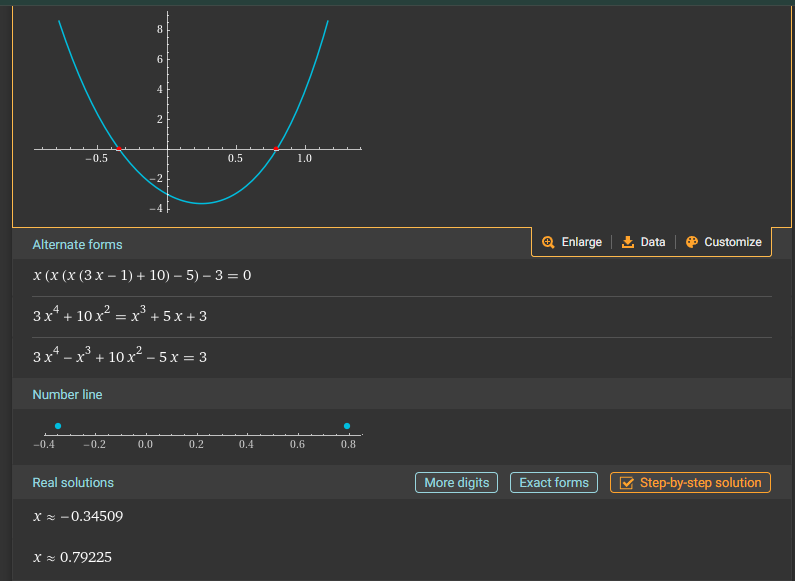

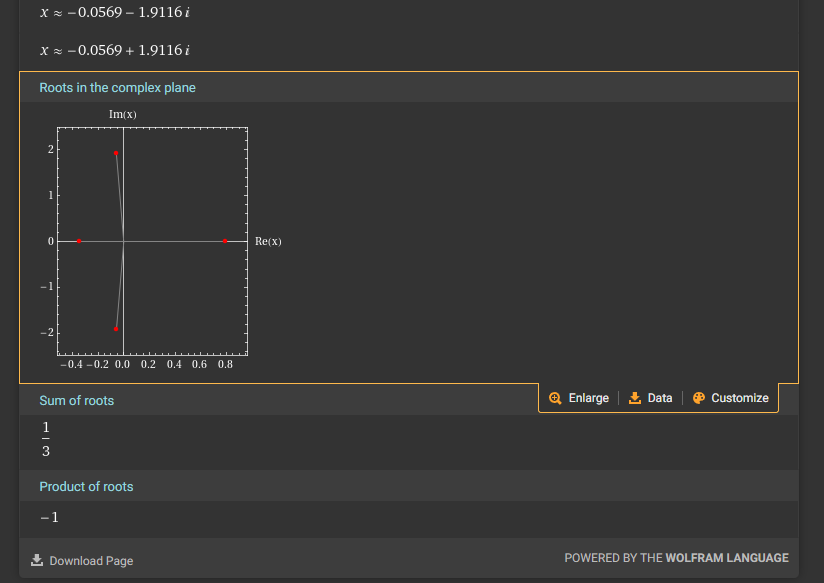

In [18]:
#Лр3. Метод Ньютона (дотичних). Комбінований метод

def nuton(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(b)
    if f(b) * df2 > 0:
        xi = b
    else:
        xi = a
    df = nd.Derivative(f, n=1)(xi)
    xi_1 = xi - f(xi) / df
    while abs(xi_1 - xi) > eps:
        xi = xi_1
        xi_1 = xi - f(xi) / df
    print('Метод Ньютона, x = ', xi_1.round(4))

def komb(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(a)
    if f(a) * df2 > 0:
        a0 = a
        b0 = b
    else:
        a0 = b
        b0 = a
    ai = a0
    bi = b0
    while abs(ai - bi) > eps:
        ai_1 = ai - f(ai) * (bi - ai) / (f(bi) - f(ai))
        bi_1 = bi - f(bi) / nd.Derivative(f, n=1)(bi)
        ai = ai_1
        bi = bi_1
    x = (ai_1 + bi_1) / 2

    print('Комбінований метод, x = ', x.round(4))

if __name__ == "__main__":
    a1, b1 = -1, 0
    a2, b2 = 0, 1
    eps = 0.0001

    print("Розв'язання на відрізку [-1, 0]")
    nuton(a1, b1, eps, f)
    komb(a1, b1, eps, f)
    print("\n Розв'язання на відрізку [0, 1]")
    nuton(a2, b2, eps, f)
    komb(a2, b2, eps, f)

Розв'язання на відрізку [-1, 0]
Метод Ньютона, x =  -0.3453
Комбінований метод, x =  -0.3451

 Розв'язання на відрізку [0, 1]
Метод Ньютона, x =  0.7923
Комбінований метод, x =  -0.3451
